In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')
datos = pd.read_csv("Mall_Customers.csv")
datos.head(14)

,CustomerID,Gender,Age,Annual Income (k$),SpendingScore (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
datos.shape

(200, 5)

In [3]:
data=datos.drop(['Gender'], axis=1)
data.head()

,CustomerID,Age,Annual Income (k$),SpendingScore (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),SpendingScore (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Revision de datos faltantes**
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos

In [5]:
data.isna().sum()

CustomerID               0
Age                      0
Annual Income (k$)       0
SpendingScore (1-100)    0
dtype: int64

In [6]:
print("Age",data['Age'].isin([0]).sum())

Age 0


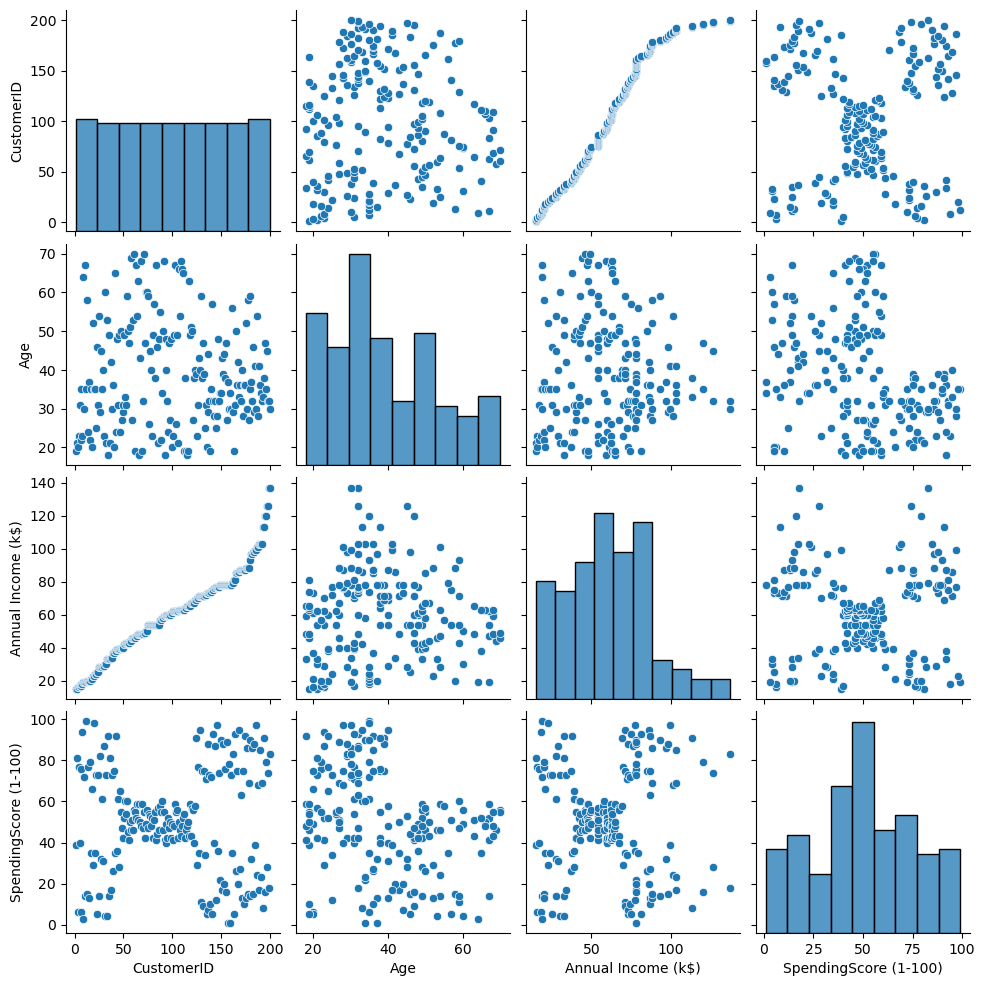

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
#sns.pairplot(data.dropna(), size=4,kind='scatter')

In [9]:
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),SpendingScore (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
SpendingScore (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

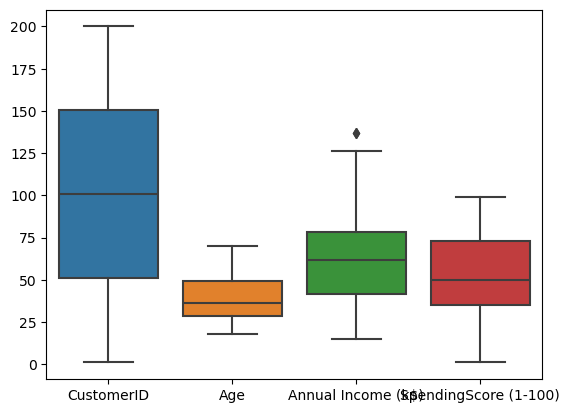

In [10]:
sns.boxplot(data=data)

**Identificacion de datos Atipicos**

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

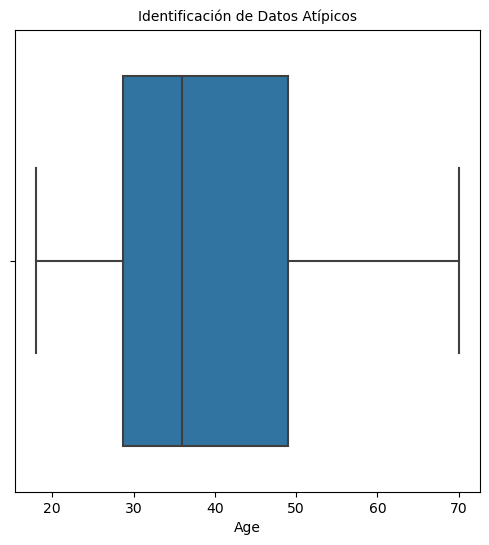

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [12]:
#Conteo de Datos Atípicos
#coloco minimo de km 200 y maximo 380000 si es inferior a este rango y superior son datos atipicos teniendo en cuenta que son modelos de 1985 y no deberian tener menos de 200 ni el maximo colocado  

nivel_minimo=00
nivel_maximo=80
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [13]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CustomerID             200 non-null    int64
 1   Age                    200 non-null    int64
 2   Annual Income (k$)     200 non-null    int64
 3   SpendingScore (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


**Diagrama de Dispersion**

<Axes: xlabel='Age', ylabel='CustomerID'>

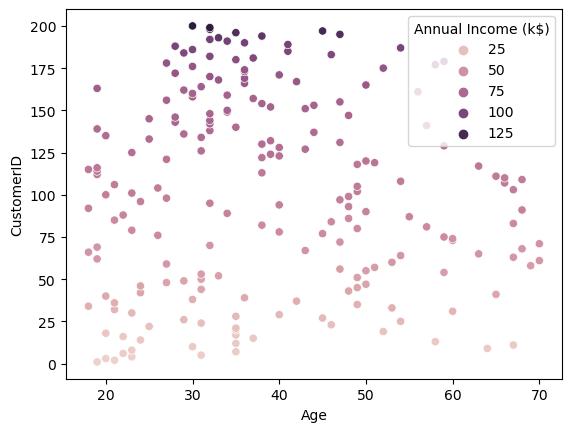

In [15]:
sns.scatterplot(x = "Age", y = "CustomerID", hue = "Annual Income (k$)", data = data)

**Entrenar el modelo configurando los diferentes hiperparámetros**

In [16]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),SpendingScore (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


In [17]:
# K-Means

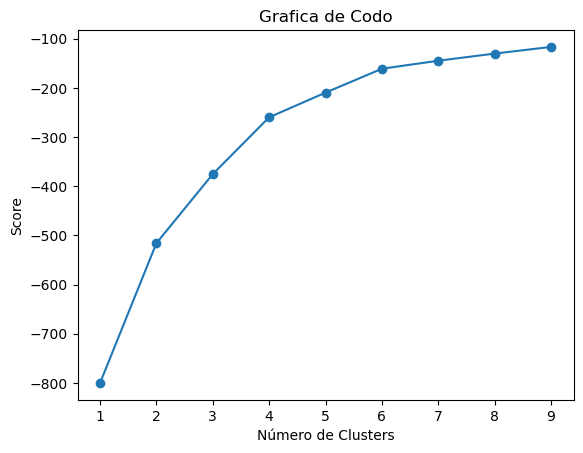

In [39]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Grafica de Codo')
plt.show()

**Generación del modelo de Agrupamiento del modelo con 3 Grupos de  agrupamiento**

In [19]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.47436436,  1.15787451, -0.42523207, -0.38283068],
       [ 0.96109881, -0.3121851 ,  0.89912973,  0.06446185],
       [-1.0239213 , -0.86423656, -0.98001477,  0.34984199]])

In [20]:
labels = kmeans.labels_
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

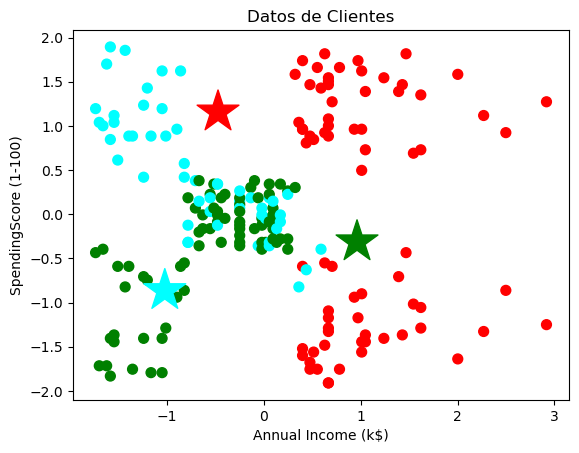

In [41]:
f1 = X['Annual Income (k$)'].values
f2 = X['SpendingScore (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore (1-100)')
plt.show()

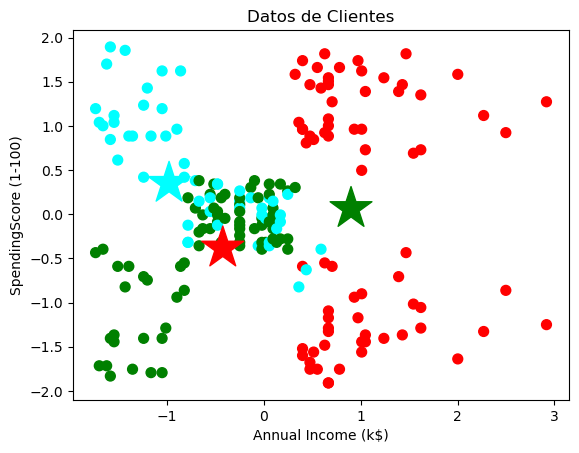

In [42]:
f1 = X['Annual Income (k$)'].values
f2 = X['SpendingScore (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore (1-100)')
plt.show()

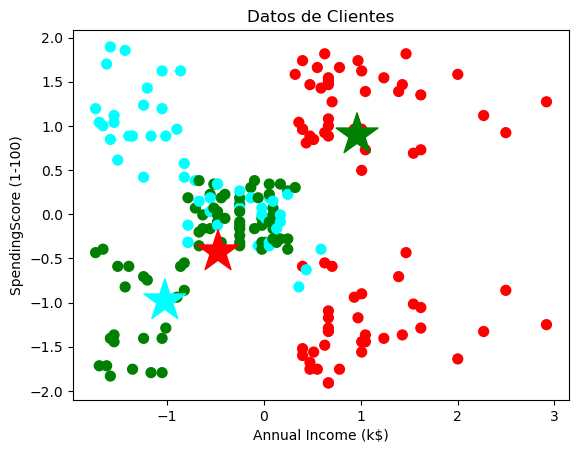

In [43]:
f1 = X['Annual Income (k$)'].values
f2 = X['SpendingScore (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore (1-100)')
plt.show()

In [ ]:
#Metricas K-Means

In [24]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


In [25]:

print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.33627250175154105
Índice de Calinski-Harabasz: 111.48622496693122
Inertia (suma de cuadrados dentro de los clusters): 375.2627107440476
Davies-Bouldin Index: 1.0218705983348075


**Dendograma**

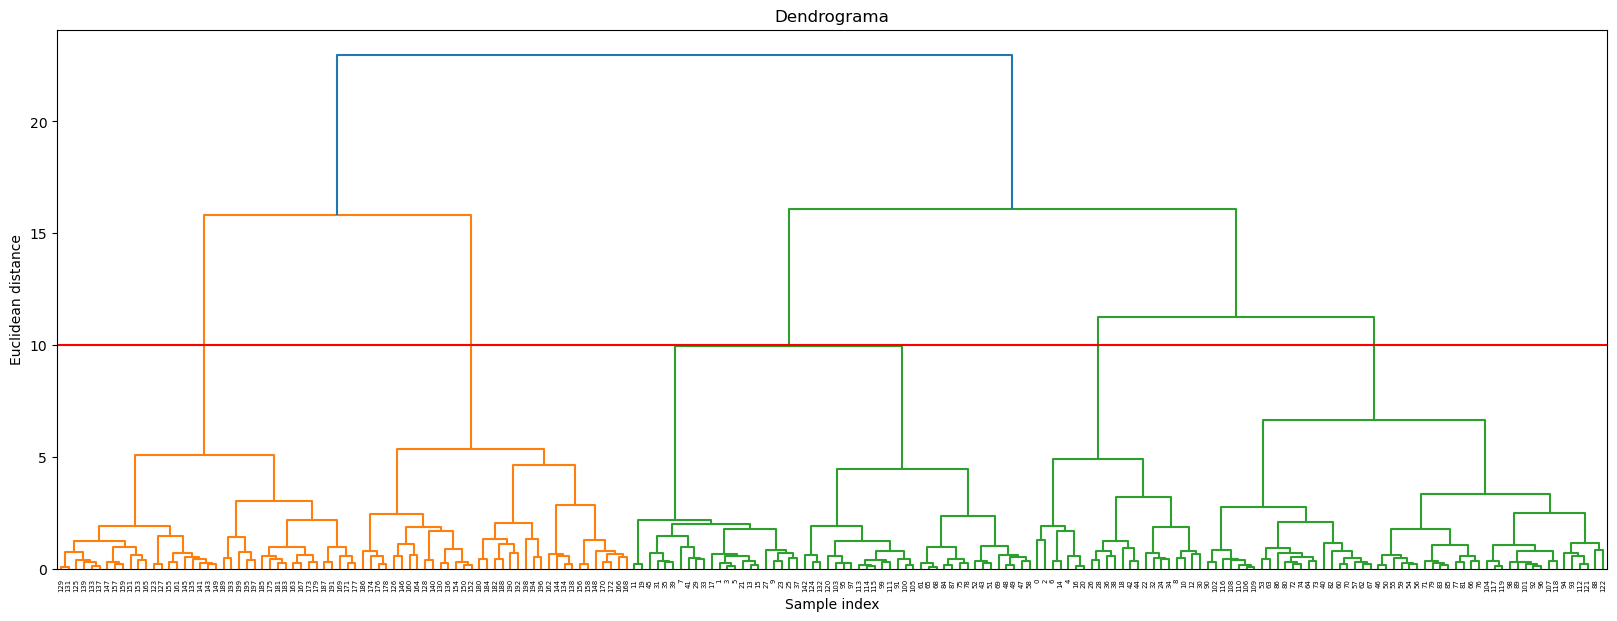

In [27]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [28]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [29]:
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

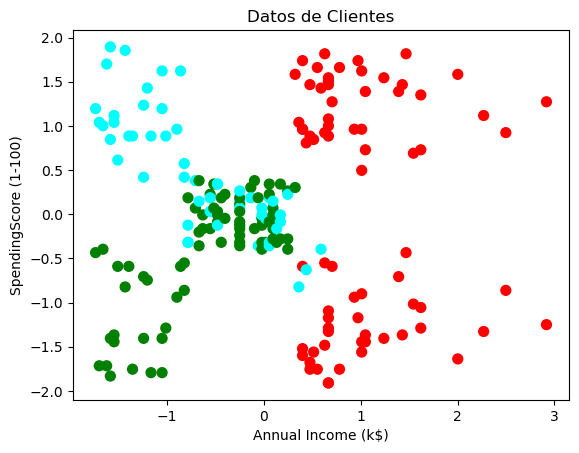

In [44]:
f1 = X['Annual Income (k$)'].values
f2 = X['SpendingScore (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=50)
plt.title('Datos de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore (1-100)')
plt.show()

In [31]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

**Método silhouette**


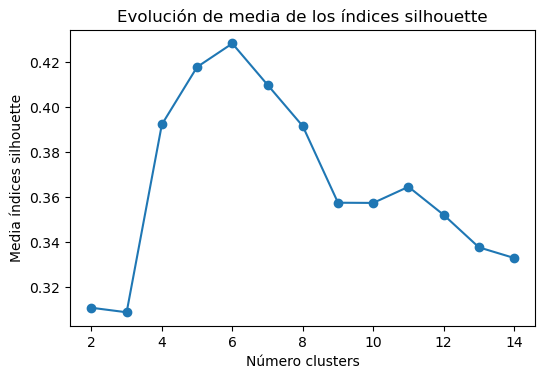

In [46]:

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [33]:
from scipy.cluster.hierarchy import linkage
X_dist = pdist(X)
Z = linkage(X, 'ward')
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


In [36]:
from scipy.cluster.hierarchy import linkage
X_dist = pdist(X)
Z = linkage(X, 'ward')
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


In [38]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_datos)
data['Cluster'] = kmeans.labels_

NameError: name 'scaled_datos' is not defined